<a href="https://colab.research.google.com/github/guupiii/ESAA/blob/main/YB_1114_%EC%97%B0%EC%8A%B5%EB%AC%B8%EC%A0%9C_%ED%9A%8C%EA%B7%802.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **1. 규제 선형 회귀 모델/ 회귀 트리**
- 릿지 회귀모델 및 회귀 트리를 이용하여 전복의 나이를 예측해 보세요.

- 전복의 ‘성별’, ‘키’, ‘지름’, ‘높이’, ‘전체무게’, ‘몸통무게’, ‘내장무게’, ‘껍질무게’를 이용해 ‘껍질의 고리수’를 예측한 뒤, **예측된 ‘껍질의 고리수’에 1.5를 더하면 전복의 나이**가 됩니다.

In [1]:
# 기본 모듈 불러오기
import numpy as np
import pandas as pd

import warnings
warnings.filterwarnings(action='ignore')

In [2]:

from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


### 1) 데이터 불러오기 및 데이터 선택

In [3]:
# 데이터 로드
data = pd.read_csv("/content/drive/MyDrive/MLData/abalone.csv")

# 성별 M은 Male, F는 Female, I는 Infant 이므로 따로 열 만들기
for label in "MFI":
    data[label] = data["Sex"] == label
data.drop('Sex', axis=1, inplace=True)

# X,y 데이터 선택
y = data.Rings.values
data.drop('Rings', axis=1, inplace=True)

X = data.values.astype(float)

## 2) train/test 분리
: 테스트 셋과 데이터 셋을 7:3 비율로 분리하세요.

In [5]:
# 필요한 모듈 불러오기
from sklearn.model_selection import train_test_split



In [6]:
# train과 test set 분리 (train:test = 7:3 비율로)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, shuffle=True)

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((2923, 10), (1254, 10), (2923,), (1254,))

## 3) 릿지 모델을 이용한 모델링
: 릿지 모델을 이용하여 전복의 나이를 예측해 보고 결과를 평가해 보세요.

 3-1) 릿지모델 생성, 교차검증, 평가에 필요한 모듈을 불러오세요.

In [14]:
# 필요한 모듈 불러오기
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score
import numpy as np

3-2) 릿지 모델을 생성하고 훈련하여 MSE와 RMSE를 구하세요. 릿지 모델 생성 시  alpha는 0.3으로 설정합니다. (교차 검증 하지 않습니다.)

In [17]:
#릿지모델 생성 및 훈련
ridge = Ridge(alpha=0.3)
ridge.fit(X_train, y_train)

#예측값 구하기
y_pred = ridge.predict(X_test)

#구한 예측값을 활용해 최종적으로 전복의 나이 예측
y_test_age = y_test + 1.5
y_pred_age = y_pred + 1.5

#MSE와 RMSE구하기
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

print(mse, rmse)

4.772148639987027 2.1845248087369087


3-3) 릿지 모델에서 회귀 계수 값을 구해 알 수 있는 점을 작성하시오. (각 컬럼의 정보는 data.colums 참고)

In [16]:
data.columns

Index(['Length', 'Diameter', 'Height', 'Whole weight', 'Shucked weight',
       'Viscera weight', 'Shell weight', 'M', 'F', 'I'],
      dtype='object')

양수면 나이가 증가, 음수면 나이가 감소

3-3) 교차검증을 이용하여 0, 0.1, 1, 10, 100 중  모델 성능이 가장 좋게 나오는 (rmse가 최소가 되는) alpha를 구하세요.

In [18]:
# 주어진 alpha
alphas=[0, 0.1, 1, 10, 100]

In [19]:
#alphas list 값을 반복하면서 alpha에 따른 평균 rmse를 구함


  #cross_val_score를 이용해 5 폴드의 평균 RMSE를 계산


avg_rmse_list = []

for a in alphas:
    ridge_cv = Ridge(alpha=a)
    # cross_val_score는 -MSE를 반환 → 음수로 나오므로 부호를 뒤집어 사용
    neg_mse = cross_val_score(
        ridge_cv, X, y,
        scoring="neg_mean_squared_error",
        cv=5
    )
    rmse = np.sqrt(-neg_mse.mean())
    avg_rmse_list.append(rmse)

# 가장 좋은 alpha 선택
best_alpha = alphas[np.argmin(avg_rmse_list)]
best_alpha

1

## 4) XGBRegressor을 이용한 모델링
: XGBRegressor 모델을 이용하여 전복의 나이를 예측해 보고 결과를 평가해 보세요.

4-1) XGBRegressor 훈련, 평가에 필요한 모듈을 불러오세요.

In [7]:
# 필요한 모듈 임포트
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error
import numpy as np

4-2) XGBregressor 모델을 생성하고 훈련하여 MSE와 RMSE를 구하세요.

In [8]:
#모델 생성 및 훈련
model = XGBRegressor(
    n_estimators=100,
    learning_rate=0.1,
    max_depth=5,
    subsample=0.5,
    colsample_bytree=0.5,
    random_state=42
)

model.fit(X_train, y_train)

#예측값 구하기
y_pred = model.predict(X_test)

#구한 예측값을 활용해 최종적으로 전복의 나이 예측
y_test_age = y_test + 1.5
y_pred_age = y_pred + 1.5

#MSE와 RMSE 구하기
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

print("MSE :", mse)
print("RMSE :", rmse)

MSE : 4.883471965789795
RMSE : 2.209857906244154


4-3) 생성한 모델의 피처 중요도를 시각화해보세요.

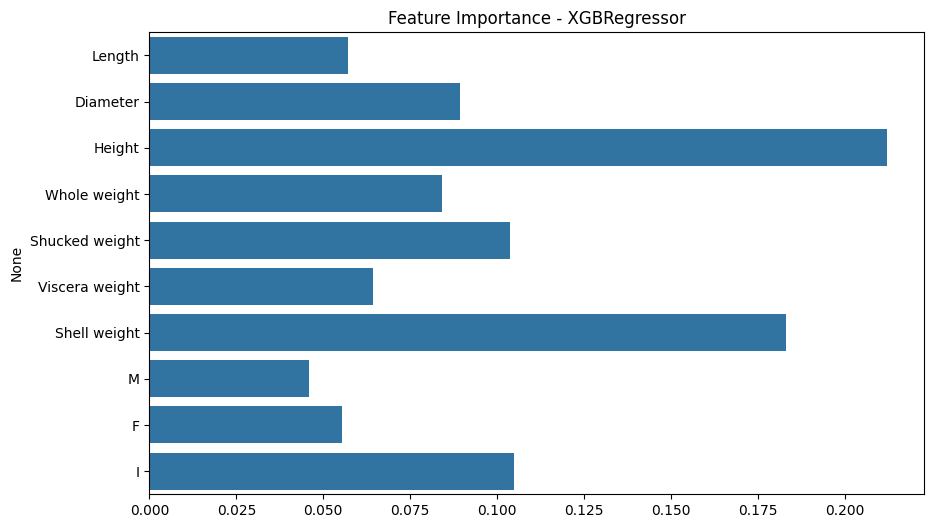

In [12]:
import seaborn as sns
%matplotlib inline

import seaborn as sns
import matplotlib.pyplot as plt

importance = model.feature_importances_

feature_names = data.columns

plt.figure(figsize=(10, 6))
sns.barplot(x=importance, y=feature_names)
plt.title("Feature Importance - XGBRegressor")
plt.show()

---

# **2. 로지스틱 회귀분석**
load_wine() 함수를 이용하여 와인 데이터를 다항분류하는 로지스틱 회귀모델을 생성하세요.

In [13]:
# 필요한 모듈 불러오기
from sklearn.datasets import load_wine
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

## 1) 데이터 불러오기 및 변수 선택

In [20]:
wine = load_wine()

wine_x = wine.data # x변수
wine_y = wine.target # y변수

## 2) train/test 셋 분리

In [21]:
x_train, x_test, y_train, y_test = train_test_split(wine_x, wine_y, test_size=0.3, random_state=123)

x_train.shape
y_train.shape

(124,)

## 3) 로지스틱 회귀모델을 이용한 모델링

3-1) 로지스틱 회귀모델을 생성하여 훈련하세요.

In [22]:
log_model = LogisticRegression(max_iter=500)
log_model.fit(x_train, y_train)

LogisticRegression(max_iter=500)

3-2) 회귀 모델의 기울기와 절편을 구하세요.

In [23]:
#기울기
log_model.coef_

array([[-6.37192884e-01,  6.00788572e-01,  4.48846962e-01,
        -2.52955090e-01, -8.30997362e-04,  3.05030416e-01,
         8.92992017e-01,  2.86575257e-02,  4.53413549e-03,
         1.42753741e-01, -9.05353660e-02,  5.32350862e-01,
         9.23818582e-03],
       [ 7.44202926e-01, -9.85421080e-01, -4.69961143e-01,
         2.07392880e-01, -2.46244662e-02,  2.37926817e-01,
         5.80874257e-02,  6.83469443e-02,  5.09826310e-01,
        -8.09602533e-01,  4.25776029e-01,  2.29803021e-01,
        -8.09696151e-03],
       [-1.07010042e-01,  3.84632508e-01,  2.11141815e-02,
         4.55622098e-02,  2.54554636e-02, -5.42957233e-01,
        -9.51079443e-01, -9.70044700e-02, -5.14360445e-01,
         6.66848792e-01, -3.35240663e-01, -7.62153883e-01,
        -1.14122431e-03]])

In [24]:
#절편
log_model.intercept_

array([-0.20122068,  0.28650788, -0.08528721])

3-3) 모델의 정확도를 구하세요.

In [25]:
#모델의 예측값 구하기
y_pred = log_model.predict(x_test)

#모델의 정확도 구하기
accuracy = metrics.accuracy_score(y_test, y_pred)
print("정확도 :", accuracy)


정확도 : 0.9444444444444444
